In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import halem.Base_functions as halem
import os
from cartopy import config
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from netCDF4 import Dataset, num2date
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.ticker import PercentFormatter


In [18]:
coords_WGS = np.loadtxt('E:/Use_case_Schouwen/baty_WGS.csv')   
start = [3.67670012, 51.70969009]                     # Location of the koppelpunt                             (lon, lat)
stop = [3.522637481591586,51.76880095558772]          # Location of the dredging area                          (lon, lat)

D_emp = 4.0
D_full = 8.0
ukc = 1.0
tide = -1.6

N = 200
x_r = np.arange(coords_WGS[:,0].min(), coords_WGS[:,0].max(), (coords_WGS[:,0].max() - coords_WGS[:,0].min())/N)
y_r = np.arange(coords_WGS[:,1].min(), coords_WGS[:,1].max(), (coords_WGS[:,1].max() - coords_WGS[:,1].min())/N)
y_r, x_r = np.meshgrid(y_r,x_r)

WD_r = 0 -  griddata(coords_WGS[:,:2], coords_WGS[:,2], (x_r, y_r), method= 'linear')
WD_r[np.isnan(WD_r)] = 0
cval = [-100000,D_emp+ukc+tide, D_full+ukc-tide, 100]
cval2 = [D_emp+ukc+tide, D_full+ukc-tide]

segments = np.load('06_DCSM-FM_100m_NB2/segments.npy')
norma = np.arange(len(segments))
norm = plt.Normalize(0, len(segments))

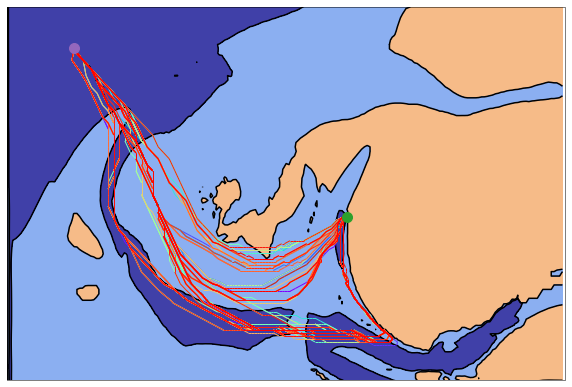

In [19]:
plt.figure(figsize = (10,10))
ax = plt.subplot(projection=ccrs.Mercator())
im = plt.contourf(x_r,y_r,WD_r,cval,
                  transform=ccrs.PlateCarree(), 
                  colors = ('sandybrown', 'cornflowerblue', 'darkblue'),
                  alpha = 0.75
                 )

plt.contour(x_r,y_r,WD_r,cval2,transform=ccrs.PlateCarree(), colors = 'black')

ax.set_extent([coords_WGS[:,0].min(),coords_WGS[:,0].max(),coords_WGS[:,1].min()*1.0015,coords_WGS[:,1].max()*0.998])
plt.plot(start[0], start[1],'o',color = 'tab:green',transform=ccrs.PlateCarree(), label =  'Nourishment location', markersize = 10)
plt.plot(stop[0], stop[1], 'o',color = 'tab:purple',transform=ccrs.PlateCarree() , label = 'Mining location', markersize = 10)


lc = LineCollection(segments, linewidth = 1, cmap='rainbow', norm=norm, transform=ccrs.PlateCarree())
lc.set_array(norma)
line = ax.add_collection(lc)

plt.show()